Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots.

In [ ]:
from google.colab import files
upload=files.upload()

Saving my_movies.csv to my_movies.csv


In [ ]:
import pandas as pd
df=pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
df.corr()

<ipython-input-3-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [ ]:
len(df)

10

In [ ]:
trans = []
for i in range(0,10):
  trans.append([str(df.values[i,j]) for j in range(0, 15)])
trans

[['Sixth Sense',
  'LOTR1',
  'Harry Potter1',
  'Green Mile',
  'LOTR2',
  '1',
  '0',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1'],
 ['Gladiator',
  'Patriot',
  'Braveheart',
  'nan',
  'nan',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0'],
 ['LOTR1',
  'LOTR2',
  'nan',
  'nan',
  'nan',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Harry Potter1',
  'Harry Potter2',
  'nan',
  'nan',
  'nan',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'nan',
  'nan',
  'nan',
  '0',
  

In [ ]:
!pip install apyori
from apyori import apriori
rules=apriori(transactions = trans,
              min_support=0.003,
              min_confidence=0.2,
              min_lift=3,
              min_length=2,
              max_length=2)
rules

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=04672b6cef91d4b9994ba111b6071c3c5e827e6862a30c31975a26eff8b3b481
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


<generator object apriori at 0x7f2610801e70>

In [ ]:
report=list(rules)
report

[RelationRecord(items=frozenset({'Green Mile', 'LOTR'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'Harry Potter1', 'Harry Potter2'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Harry Potter1'}), items_add=frozenset({'Harry Potter2'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'Harry Potter2'}), items_add=frozenset({'Harry Potter1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'LOTR2', 'LOTR1'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'LOTR2'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR2'}), items_add=frozenset({'LOTR1'}), confidence=1.0, lift=5.0)])]

In [ ]:
len(report)

3

In [ ]:
report[0]

RelationRecord(items=frozenset({'Green Mile', 'LOTR'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)])

In [ ]:
report[0][1]  #support

0.1

In [ ]:
report[0][2][0][0]  # 1st order Base item

frozenset({'Green Mile'})

In [ ]:
report[0][2][0][1]  # 1st order Add item

frozenset({'LOTR'})

In [ ]:
report[0][2][0][2]  # 1st order Confidence item

0.5

In [ ]:
report[0][2][0][3]  # 1st order Lift item

5.0

In [ ]:
report[0][2][1][0]  # 2nd order Base item

frozenset({'LOTR'})

In [ ]:
report[0][2][1][1]  # 2nd order Add item

frozenset({'Green Mile'})

In [ ]:
report[0][2][1][2]  # 2nd order Confidence item

1.0

In [ ]:
report[0][2][1][3]  # 2nd order Lift item

5.0

In [ ]:
# Access through the loop
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
k=[]

for i in range(0,3):
  a.append(report[i][1]) # support
  b.append(report[i][2][0][0])  # 1st order Base item
  c.append(report[i][2][0][1])  # 1st order Add item
  d.append(report[i][2][0][2])  # 1st order Confidence item
  e.append(report[i][2][0][3])  # 1st order Lift item
  f.append(report[i][2][1][0])  # 2nd order Base item
  g.append(report[i][2][1][1])  # 2nd order Add item
  h.append(report[i][2][1][2])  # 2nd order Confidence item
  k.append(report[i][2][1][3])  # 2nd order Lift item

In [ ]:
df["Support"] = pd.DataFrame(a)
df["1st_order_Base_item"] = pd.DataFrame(b)
df["1st_order_Add_item"] = pd.DataFrame(c)
df["1st_order_Confidence_item"] = pd.DataFrame(d)
df["1st_order_Lift_item"] = pd.DataFrame(e)
df["2nd_order_Base_item"] = pd.DataFrame(f)
df["2nd_order_Add_item"] = pd.DataFrame(g)
df["2nd_order_Confidence_item"] = pd.DataFrame(h)
df["2nd_order_Lift_item"] = pd.DataFrame(k)
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,...,Green Mile,Support,1st_order_Base_item,1st_order_Add_item,1st_order_Confidence_item,1st_order_Lift_item,2nd_order_Base_item,2nd_order_Add_item,2nd_order_Confidence_item,2nd_order_Lift_item
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,...,1,0.1,Green Mile,LOTR,0.5,5.0,LOTR,Green Mile,1.0,5.0
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,...,0,0.1,Harry Potter1,Harry Potter2,0.5,5.0,Harry Potter2,Harry Potter1,1.0,5.0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,...,0,0.2,LOTR1,LOTR2,1.0,5.0,LOTR2,LOTR1,1.0,5.0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


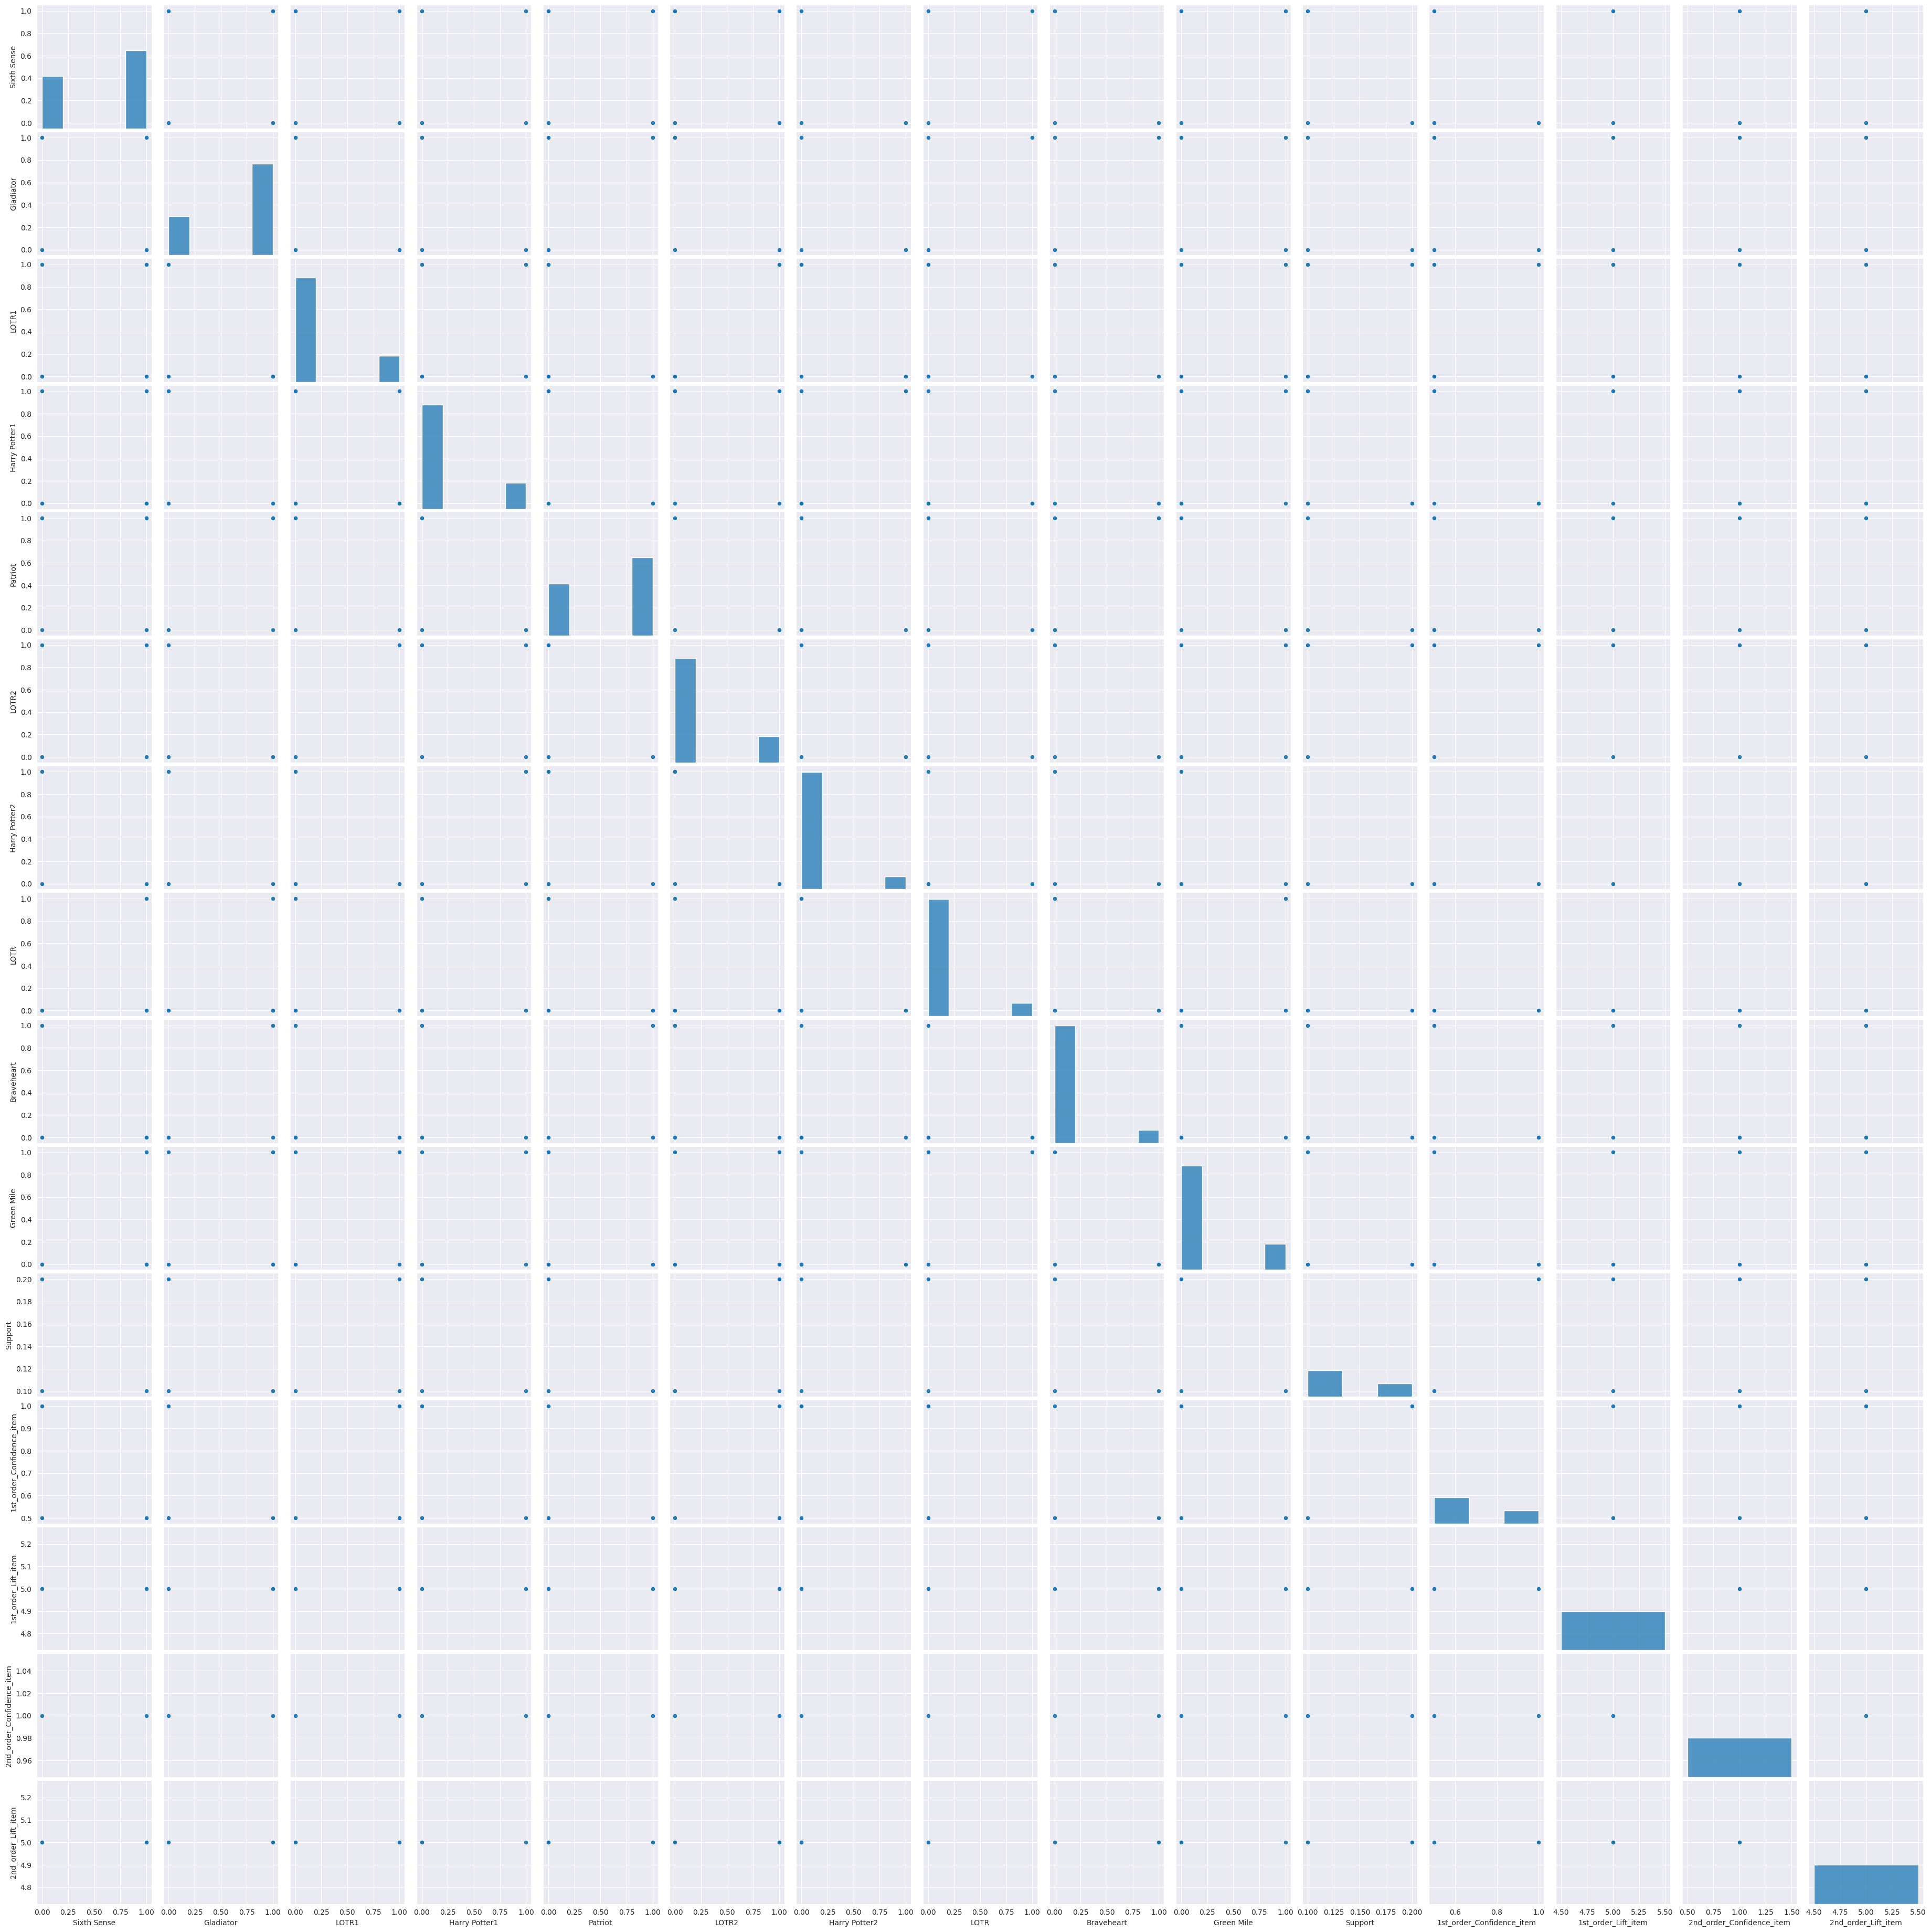

In [ ]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)